In [1]:
from math import sin, pi, exp

import pandas as pd
import numpy as np

import forecast
from forecast import plot_line, plot_time_series

/Users/adam/anaconda3/envs/forecast/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/adam/anaconda3/envs/forecast/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/adam/anaconda3/envs/forecast/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/adam/anaconda3/envs/forecast/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/adam/anaconda3/envs/forecast/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  retu

Work below is based on Chapter 7 of [LSTM Networks with Python](https://machinelearningmastery.com/lstms-with-python/).  Some changes have been made to variable names

In [2]:
# generate damped sine wave in [0,1]
def generate_sequence(length, period, decay):
    return [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]

In [3]:
seq = generate_sequence(102, 20, 0.05)

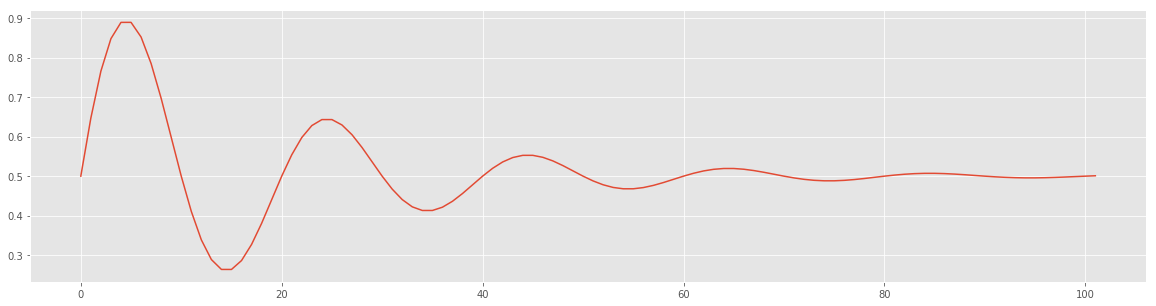

In [4]:
f = plot_line(y=seq, figsize=(20, 5))

In [5]:
# generate input and output pairs of damped sine waves
def generate_examples(length, samples, test_length):
    X, y = list(), list()
    for _ in range(samples):
        p = np.random.randint(10, 40)
        d = np.random.uniform(0.01, 0.05)
        sequence = generate_sequence(length + test_length, p, d)
        X.append(sequence[:-test_length])
        y.append(sequence[-test_length:])

    X = np.array(X).reshape(samples, length, 1)
    y = np.array(y).reshape(samples, test_length)
    return X, y

In [6]:
x, y = generate_examples(length=20, samples=5, test_length=5)

In [7]:
print(x.shape)
print(y.shape)

(5, 20, 1)
(5, 5)


[<Figure size 1440x72 with 1 Axes>,
 <Figure size 1440x72 with 1 Axes>,
 <Figure size 1440x72 with 1 Axes>,
 <Figure size 1440x72 with 1 Axes>,
 <Figure size 1440x72 with 1 Axes>]

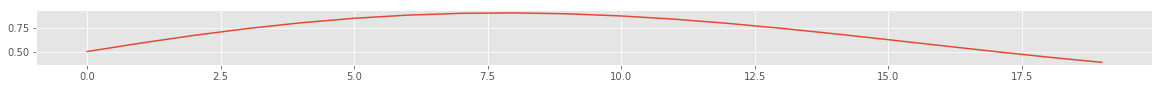

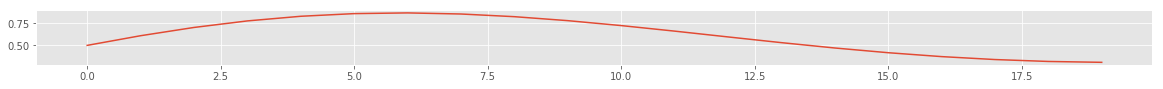

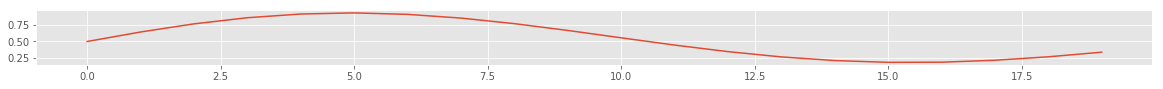

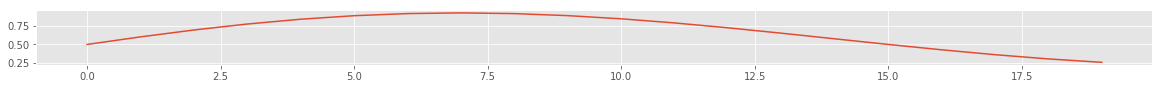

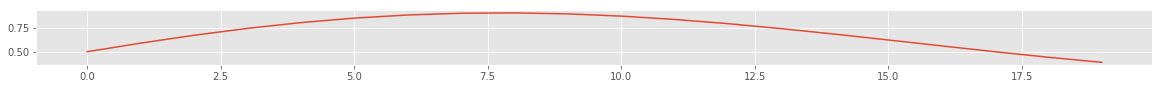

In [8]:
[plot_line(y=x[n, :, 0], figsize=(20, 1)) for n in range(x.shape[0])]

We are building a many-to-one sequence problem - feeding in the sequence and then making a single prediction.  This prediction is for n time steps (where n = output)

In [9]:
input_length = 15
test_length = 20

model = forecast.make_model(
    model_id='lstm',
    input_length=input_length,
    layers=(20, 20),
    output_nodes=test_length,
    lr=0.001,
    batch_size=64,

)

making lstm
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 15, 20)            1760      
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
Total params: 5,460
Trainable params: 5,460
Non-trainable params: 0
_________________________________________________________________
None


### Training

In [10]:
X, y = generate_examples(input_length, 100000, test_length)
hist = model.fit(X, y, epochs=1)

Epoch 1/1
100000/100000 [==============================] - 39s 386us/step - loss: 0.0774


### Predictions

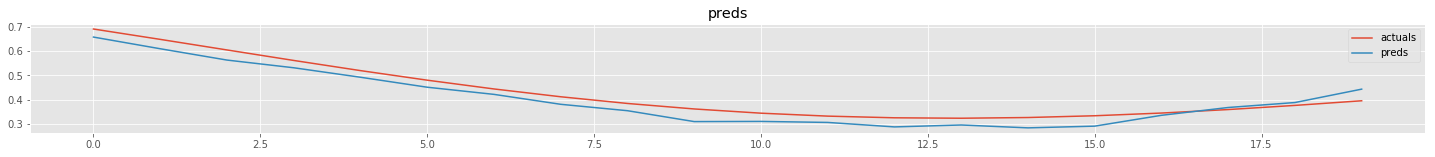

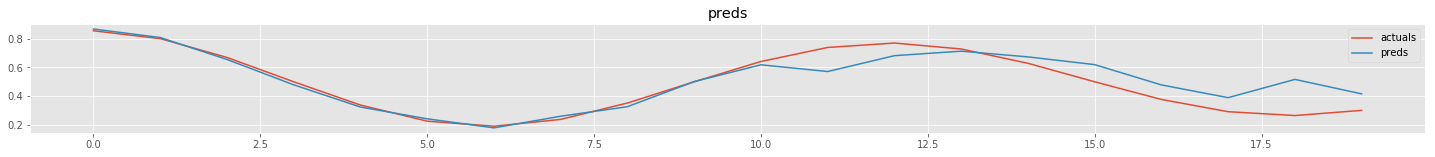

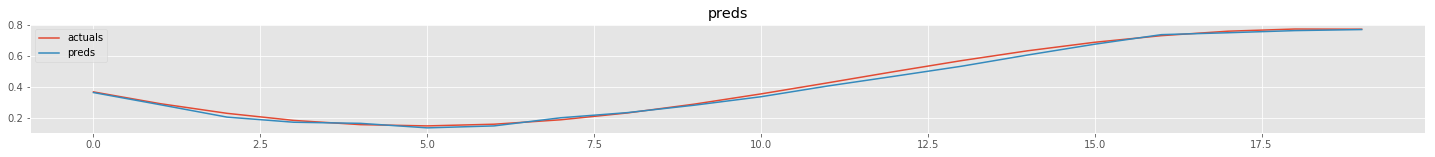

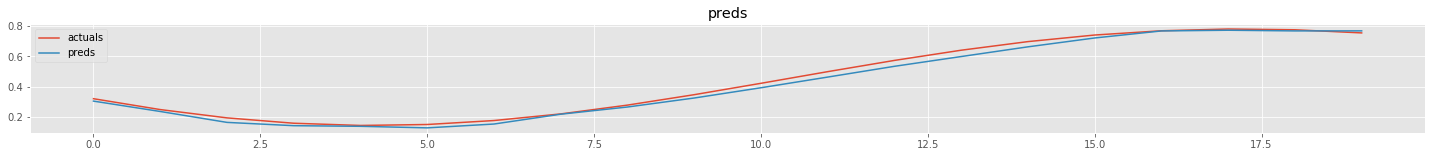

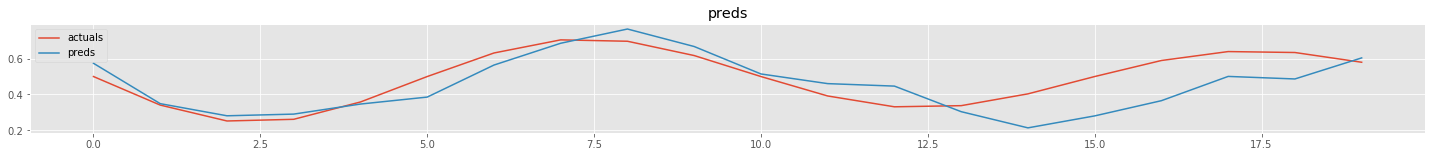

In [11]:
def make_prediction():
    X, y = generate_examples(input_length, 1, test_length)
    preds = model.predict(X)

    df = pd.DataFrame(index=np.arange(len(y[0])))
    df.loc[:, 'actuals'] = y[0]
    df.loc[:, 'preds'] = preds[0]

    return plot_time_series(df, list(df.columns), same_plot=True)


for _ in range(5):
    make_prediction()